File Name: assess_generated_samples 

Description: This file uses the decision tree that was trained on the orginal data to test how well the generated samples fit.
If the generated samples are of high quality then the decision tree should get similar accuracy to the orginal test set made from the orginal data.

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import math

In [ ]:
#load the decision tree classifier
with open("../../models/samples_classifier.pkl", "rb") as f:
    decision_tree = pickle.load(f)

# assess CVAE ouputs

In [ ]:
#get the generated samples from types of generation 

with open("../../data/gen_data/cvae_p_gens.pkl", "rb") as f: 
    cvae_vecs_p = pickle.load(f)
    
with open("../../data/gen_data/cvae_gens.pkl", "rb") as f: 
    cvae_vecs = pickle.load(f)
    

Get vectors and labels for samples generated with prototype vectors 

In [4]:
cvae_labels_p = []
cvae_vectors_p = []

for label, vec_list in cvae_vecs_p.items():
    l = [label] * len(vec_list)
    cvae_labels_p.extend(l)
    
    cvae_vectors_p.extend(np.array(np.squeeze(np.round(vec_list))))

cvae_vectors_p = np.array(cvae_vectors_p)
cvae_labels_p = np.array(cvae_labels_p)
cvae_vectors_p.shape


(552, 252)

In [ ]:

arr6, count = np.unique(cvae_vectors_p, axis=0, return_counts=True)
count


array([336,   3,  34,  16,   9,   3,  36,   1,   3,   7,   2,   5,  12,
        16,  17,  21,   2,  23,   1,   1,   2,   2])

In [ ]:
#get average distance between the generated samples/ vectors
cvae_ave_dist_per_row = []
for vec in cvae_vectors_p:
    cvae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in cvae_vectors_p]) / (len(cvae_vectors_p)-1))
    
np.mean(cvae_ave_dist_per_row)

1.1592270590970362

In [7]:
#outputs fron CVAE prototype vectors
cvae_pred = decision_tree.predict(cvae_vectors_p)

print(f'accuracy score {accuracy_score(cvae_labels_p, cvae_pred)}')
cvae_p_pre = precision_score(cvae_labels_p, cvae_pred,average=None)
print(f'precision {cvae_p_pre}')
cvae_p_rec = recall_score(cvae_labels_p, cvae_pred, average=None)
print(f'recall {cvae_p_rec}')

accuracy score 0.42028985507246375
precision [0.         0.         0.51555556 0.         0.         0.
 0.         0.         0.         0.        ]
recall [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Get vectors and labels for samples generated with individual real recipes

In [8]:
cvae_labels = []
cvae_vectors = []

for label, vec_list in cvae_vecs.items():
    l = [label] * len(vec_list)
    cvae_labels.extend(l)
    cvae_vectors.extend(np.array(np.round(np.squeeze(vec_list))))

cvae_vectors = np.array(cvae_vectors)
cvae_labels = np.array(cvae_labels)
cvae_vectors.shape

(552, 252)

In [9]:
arr5, count = np.unique(cvae_vectors, axis=0, return_counts=True)
count

array([335,   1,  39,  14,   9,  31,   1,  10,   8,  13,   1,  16,  14,
         1,  21,   3,  25,   3,   1,   3,   3])

In [10]:
#get average distance
cvae_ave_dist_per_row = []
for vec in cvae_vectors:
    cvae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in cvae_vectors]) / (len(cvae_vectors)-1))
    
np.mean(cvae_ave_dist_per_row)

1.2014412366531975

In [11]:
#outputs fron CVAE element wise vectors
cvae_pred = decision_tree.predict(cvae_vectors)

print(f'accuracy score {accuracy_score(cvae_labels, cvae_pred)}')
cvae_pre = precision_score(cvae_labels, cvae_pred,average=None)
print(f'precision {cvae_pre}')
cvae_rec = recall_score(cvae_labels, cvae_pred, average=None)
print(f'recall {cvae_rec}')

accuracy score 0.42028985507246375
precision [0.         0.         0.52134831 0.         0.         0.
 0.         0.         0.         0.        ]
recall [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# assess BVAE ouputs

In [12]:
with open("../../data/gen_data/bvae_p_gens.pkl", "rb") as f: 
    bvae_vecs_p = pickle.load(f)
    
with open("../../data/gen_data/bvae_gens.pkl", "rb") as f: 
    bvae_vecs = pickle.load(f)
    

Get vectors and labels for samples generated with prototype vectors 

In [13]:
bvae_labels_p = []
bvae_vectors_p = []

for label, vec_list in bvae_vecs_p.items():
    l = [label] * len(vec_list)
    bvae_labels_p.extend(l)
    
    bvae_vectors_p.extend(np.array(np.squeeze(np.round(vec_list))))

bvae_vectors = np.array(bvae_vectors_p)
bvae_labels = np.array(bvae_labels_p)
bvae_vectors.shape

(552, 252)

In [14]:
#get average distance
bvae_ave_dist_per_row = []
for vec in bvae_vectors:
    bvae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in bvae_vectors]) / (len(bvae_vectors)-1))
    
np.mean(bvae_ave_dist_per_row)

1.3239785898421885

In [15]:
arr4, count = np.unique(bvae_vectors, axis=0, return_counts=True)
count

array([229,   1,  68,   2,   2,  23,   3,   1,   3,  20,   1,   1,  15,
         1,   1,   7,   2,  12,   2,  69,   8,  24,  14,   1,   1,  11,
        10,   5,   3,   2,   4,   1,   1,   1,   1,   2])

In [16]:
#outputs fron BVAE prototype vectors
bvae_pred = decision_tree.predict(bvae_vectors_p)

print(f'accuracy score {accuracy_score(bvae_labels_p, bvae_pred)}')
bvae_p_pre = precision_score(bvae_labels_p, bvae_pred,average=None)
print(f'precision {bvae_p_pre}')
bvae_p_rec = recall_score(bvae_labels_p, bvae_pred, average=None)
print(f'recall {bvae_p_rec}')

accuracy score 0.42028985507246375
precision [0.         0.         0.47736626 0.         0.         0.
 0.         0.         0.         0.        ]
recall [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Get vectors and labels for samples generated with individual real recipes

In [17]:
bvae_labels = []
bvae_vectors = []

for label, vec_list in bvae_vecs.items():
    l = [label] * len(vec_list)
    bvae_labels.extend(l)
    bvae_vectors.extend(np.array(np.round(np.squeeze(vec_list))))

bvae_vectors = np.array(bvae_vectors)
bvae_labels = np.array(bvae_labels)
bvae_vectors.shape

(552, 252)

In [18]:
bvae_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
arr3, count = np.unique(bvae_vectors, axis=0, return_counts=True)
count

array([186,   1,   1,   1,   4,   1,  13,   2,   1,   1,   4,   7,   3,
         1,   3,   1,   1,   1,   1,   6,   3,   1,   9,   2,   7,   1,
         1,   2,   1,   1,   2,   2,   1,   1,   1,   1,   1,   1,   1,
         2,   6,   1,   1,   1,   1,   2,   1,   2,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   1,   1,   1,   1,   6,   1,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   2,   1,   2,   1,   1,   3,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   8,   1,   8,   2,   1,   1,   1,   1,   1,
         3,   1,   2,   1,   1,   1,   3,   1,   1,   2,   1,   1,   1,
         1,   2,   2,   1,   1,   1,   2,   2,   1,   1,   1,   1,   1,
         1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,   4,   1,
         2,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         4,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [20]:
#get average distance
bvae_ave_dist_per_row = []
for vec in bvae_vectors:
    bvae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in bvae_vectors]) / (len(bvae_vectors)-1))
    
np.mean(bvae_ave_dist_per_row)

2.0590922980499324

In [21]:
#outputs fron BVAE element wise vectors
bvae_pred = decision_tree.predict(bvae_vectors)

print(f'accuracy score {accuracy_score(bvae_labels, bvae_pred)}')
bvae_pre = precision_score(bvae_labels, bvae_pred, average=None)
print(f'precision {bvae_pre}')
bvae_rec = recall_score(bvae_labels, bvae_pred, average=None)
print(f'recall {bvae_rec}')

accuracy score 0.44021739130434784
precision [0.         0.         0.61007958 0.         1.         0.
 0.         0.04347826 0.         0.08730159]
recall [0.         0.         0.99137931 0.         0.02325581 0.
 0.         0.02       0.         0.21153846]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# assess VAE outputs

In [22]:
with open("../../data/gen_data/vae_p_gens.pkl", "rb") as f: 
    vae_vecs_p = pickle.load(f)
    
with open("../../data/gen_data/vae_gens.pkl", "rb") as f: 
    vae_vecs = pickle.load(f)
    
np.array(vae_vecs[0]).shape

(31, 1, 252)

Get vectors and labels for samples generated with prototype vectors 

In [23]:
vae_labels_p = []
vae_vectors_p = []

for label, vec_list in vae_vecs_p.items():
    l = [label] * len(vec_list)
    vae_labels_p.extend(l)
    
    vae_vectors_p.extend(np.array(np.squeeze(np.round(vec_list))))

vae_vectors = np.array(vae_vectors_p)
vae_labels = np.array(vae_labels_p)
vae_vectors.shape

(552, 252)

In [24]:
#get average distance
vae_ave_dist_per_row = []
for vec in vae_vectors:
    vae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in vae_vectors]) / (len(vae_vectors)-1))
    
np.mean(vae_ave_dist_per_row)

0.47694713582598813

In [25]:
arr2, count = np.unique(vae_vectors, axis=0, return_counts=True)
count

array([347, 203,   2])

In [26]:
#outputs fron CVAE prototype vectors
vae_pred = decision_tree.predict(vae_vectors_p)

print(f'accuracy score {accuracy_score(vae_labels_p, vae_pred)}')
vae_p_pre = precision_score(vae_labels_p, vae_pred,average=None)
print(f'precision {vae_p_pre}')
vae_p_rec = recall_score(vae_labels_p, vae_pred, average=None)
print(f'recall {vae_p_rec}')

accuracy score 0.42028985507246375
precision [0.         0.         0.42181818 0.         0.         0.
 0.         0.         0.         0.        ]
recall [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Get vectors and labels for samples generated with individual real recipes

In [27]:
vae_labels = []
vae_vectors = []

for label, vec_list in vae_vecs.items():
    l = [label] * len(vec_list)
    vae_labels.extend(l)
    vae_vectors.extend(np.array(np.round(np.squeeze(vec_list))))

vae_vectors = np.array(vae_vectors)
vae_labels = np.array(vae_labels)
vae_vectors.shape

(552, 252)

In [28]:
#get average distance
vae_ave_dist_per_row = []
for vec in vae_vectors:
    vae_ave_dist_per_row.append(np.sum([math.dist(vec, vec_y) for vec_y in vae_vectors]) / (len(vae_vectors)-1))
    
np.mean(vae_ave_dist_per_row)

0.4846552763159696

In [29]:

arr1, count = np.unique(vae_vectors, axis=0, return_counts=True)
count

array([331, 220,   1])

In [30]:
#outputs fron CVAE element wise vectors
vae_pred = decision_tree.predict(vae_vectors)

print(f'accuracy score {accuracy_score(vae_labels, vae_pred)}')
vae_pre = precision_score(vae_labels, vae_pred, average=None)
print(f'precision {vae_pre}')
vae_rec = recall_score(vae_labels, vae_pred, average=None)
print(f'recall {vae_rec}')

accuracy score 0.42028985507246375
precision [0.         0.         0.42028986 0.         0.         0.
 0.         0.         0.         0.        ]
recall [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot a comparison of the scores

In [31]:
#original data scores

precision = [0.66666667, 0.88, 0.95890411, 1., 0.8125, 1., 0.5, 0.92857143, 0.8, 1.]
recall = [0.66666667, 0.95652174, 1., 1., 1. , 0.85714286, 0.33333333, 0.86666667, 0.44444444, 0.9375]

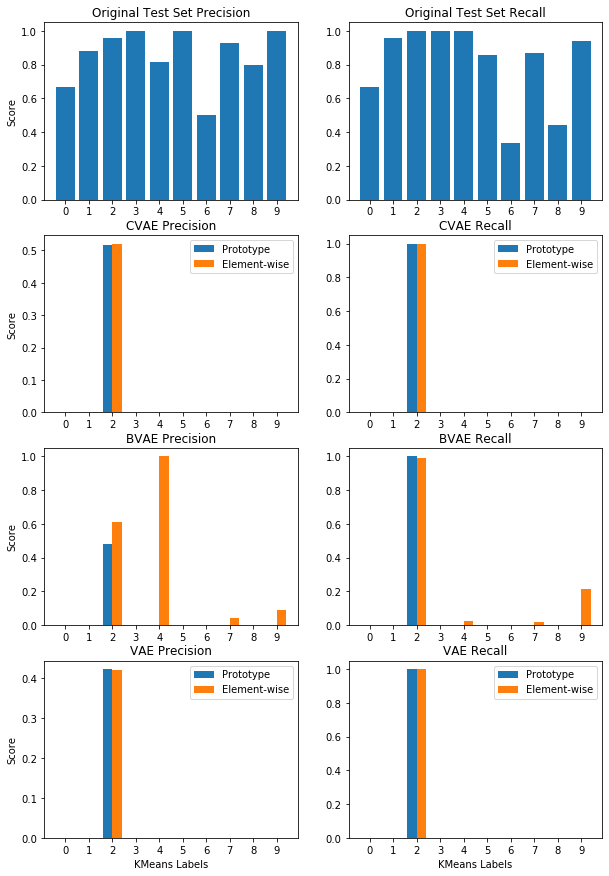

In [32]:
fig, ax = plt.subplots(4,2, figsize=(10,15))

x = np.arange(10)
w = 0.2

ax[0][0].bar(x, precision)
ax[0][0].set_title('Original Test Set Precision')
ax[0][0].set_xticks(x)
ax[0][0].set_ylabel('Score')
ax[0][1].bar(x, recall)
ax[0][1].set_title('Original Test Set Recall')
ax[0][1].set_xticks(x)


ax[1][0].bar(x - w, cvae_p_pre, width=0.4, label='Prototype')
ax[1][0].bar(x + w, cvae_pre, width=0.4, label='Element-wise')
ax[1][0].set_title('CVAE Precision')
ax[1][0].set_xticks(x)
ax[1][0].set_ylabel('Score')
ax[1][0].legend()
ax[1][1].bar(x - w, cvae_p_rec, width=0.4, label='Prototype')
ax[1][1].bar(x + w, cvae_rec, width=0.4, label='Element-wise')
ax[1][1].set_title('CVAE Recall')
ax[1][1].set_xticks(x)
ax[1][1].legend()


ax[2][0].bar(x - w, bvae_p_pre, width=0.4, label='Prototype')
ax[2][0].bar(x + w, bvae_pre, width=0.4, label='Element-wise')
ax[2][0].set_title('BVAE Precision')
ax[2][0].set_xticks(x)
ax[2][0].set_ylabel('Score')
ax[2][1].bar(x - w, bvae_p_rec, width=0.4, label='Prototype')
ax[2][1].bar(x + w, bvae_rec, width=0.4, label='Element-wise')
ax[2][1].set_title('BVAE Recall')
ax[2][1].set_xticks(x)


ax[3][0].bar(x - w, vae_p_pre, width=0.4, label='Prototype')
ax[3][0].bar(x + w, vae_pre, width=0.4, label='Element-wise')
ax[3][0].set_title('VAE Precision')
ax[3][0].set_xticks(x)
ax[3][0].set_ylabel('Score')
ax[3][0].set_xlabel('KMeans Labels')
ax[3][0].legend()
ax[3][1].bar(x - w, vae_p_rec, width=0.4, label='Prototype')
ax[3][1].bar(x + w, vae_rec, width=0.4, label='Element-wise')
ax[3][1].set_title('VAE Recall')
ax[3][1].set_xticks(x)
ax[3][1].set_xlabel('KMeans Labels')
ax[3][1].legend()

# Heat map of most common vectors

Text(0.5, 1.0, 'CVAE Prototype')

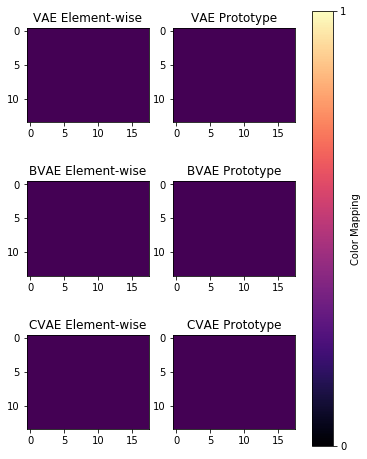

In [41]:
import matplotlib as mpl

fid, ax = plt.subplots(3,2,figsize=(6,8))

max = 1
min = 0
    


sm = mpl.cm.ScalarMappable(cmap='magma')
plt.colorbar(sm, ax=ax, ticks=(0,1), label="Color Mapping")

ax[0][0].imshow(arr1[0].reshape(14,18))
ax[0][0].set_title(f'VAE Element-wise')
ax[0][1].imshow(arr2[0].reshape(14,18))
ax[0][1].set_title(f'VAE Prototype')

ax[1][0].imshow(arr3[0].reshape(14,18))
ax[1][0].set_title(f'BVAE Element-wise')
ax[1][1].imshow(arr4[0].reshape(14,18))
ax[1][1].set_title(f'BVAE Prototype')


ax[2][0].imshow(arr5[0].reshape(14,18))
ax[2][0].set_title(f'CVAE Element-wise')
ax[2][1].imshow(arr6[0].reshape(14,18)) 
ax[2][1].set_title(f'CVAE Prototype')